In [2]:
import os
import tensorflow as tf
import keras

In [3]:
train_dir = r'C:/Users/tomeczek/Desktop/tensorflow/Praca dyplomowa/train_set/'

In [4]:
test_dir = r'C:/Users/tomeczek/Desktop/tensorflow/Praca dyplomowa/test_set/'

In [5]:
os.listdir(train_dir)

['generated', 'orginal']

In [6]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=43,
    validation_split = 0.2,
    subset = "training",
    image_size=(200, 200),
    batch_size=32
)

Found 3155 files belonging to 2 classes.
Using 2524 files for training.


In [7]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=43,
    validation_split = 0.2,
    subset = "validation",
    image_size=(200, 200),
    batch_size=32
)

Found 3155 files belonging to 2 classes.
Using 631 files for validation.


In [8]:
validation_set

<BatchDataset shapes: ((None, 200, 200, 3), (None,)), types: (tf.float32, tf.int32)>

In [14]:
class_names = training_set.class_names

In [15]:
class_names

['generated', 'orginal']

In [16]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(200,                                                           200,
                                                               3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model = Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255), # zmiana rozmiaru obrazu
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 200, 200, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)       

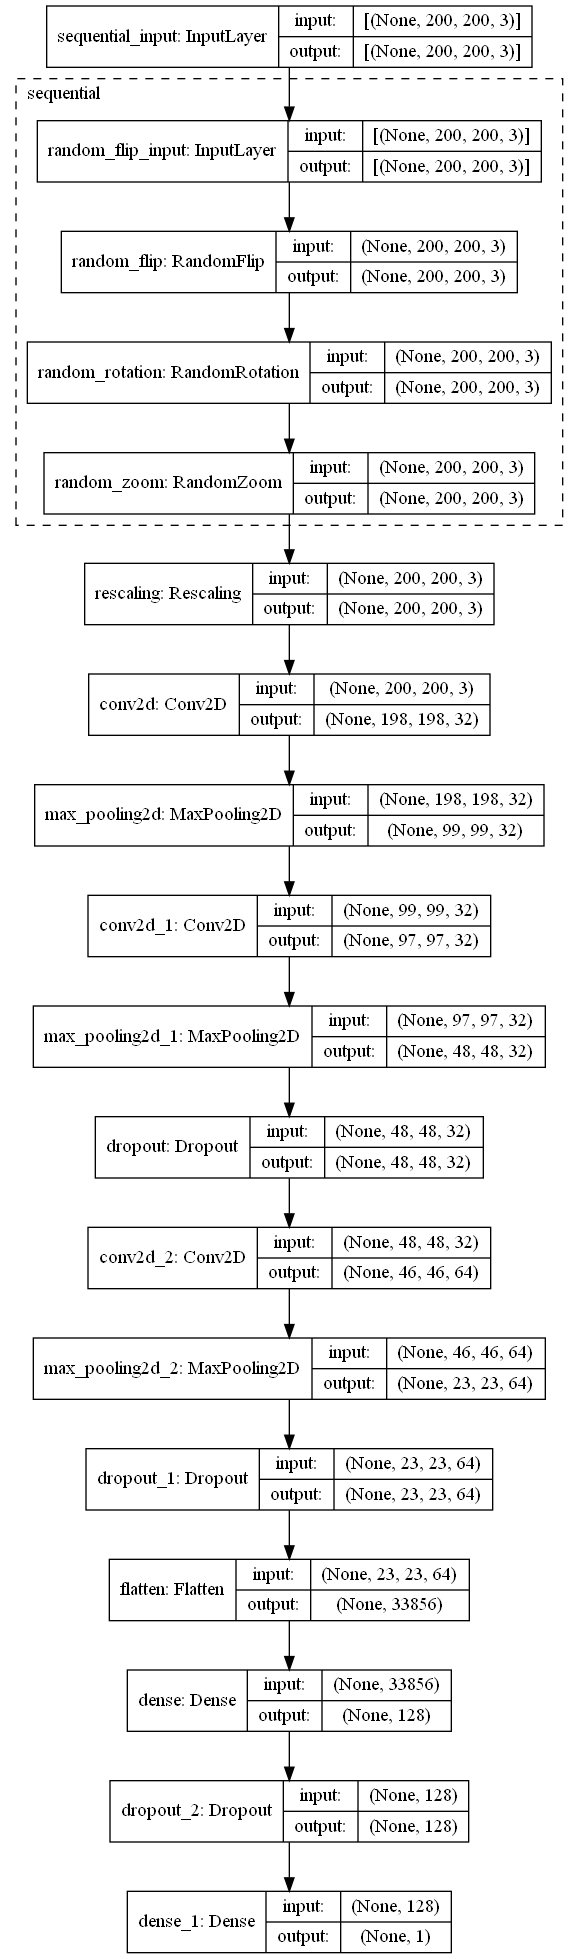

In [19]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=2)
]

In [21]:
checkpoint_filepath = 'checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

In [22]:
callbacks = [
             EarlyStopping(patience=2),
             model_checkpoint_callback,
]

In [23]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [24]:
history = model.fit(training_set,validation_data=validation_set, epochs=600,callbacks=callbacks)

Epoch 1/600


C:\Users\tomeczek\AppData\Roaming\Python\Python38\site-packages\keras\backend.py:4993: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


984/984 [==============================] - 45s 41ms/step - loss: 0.1793 - binary_accuracy: 0.9187 - val_loss: 0.0654 - val_binary_accuracy: 0.9756
INFO:tensorflow:Assets written to: checkpoint\assets
Epoch 2/600
984/984 [==============================] - 40s 40ms/step - loss: 0.0184 - binary_accuracy: 0.9933 - val_loss: 0.0198 - val_binary_accuracy: 0.9919
INFO:tensorflow:Assets written to: checkpoint\assets
Epoch 3/600
984/984 [==============================] - 40s 40ms/step - loss: 0.0145 - binary_accuracy: 0.9954 - val_loss: 0.0587 - val_binary_accuracy: 0.9751
INFO:tensorflow:Assets written to: checkpoint\assets
Epoch 4/600
984/984 [==============================] - 40s 40ms/step - loss: 0.0106 - binary_accuracy: 0.9966 - val_loss: 0.0012 - val_binary_accuracy: 0.9996
INFO:tensorflow:Assets written to: checkpoint\assets
Epoch 5/600
984/984 [==============================] - 40s 40ms/step - loss: 0.0113 - binary_accuracy: 0.9963 - val_loss: 0.0095 - val_binary_accuracy: 0.9964
Epoch

In [25]:
import pandas as pd

In [26]:
metrics_df = pd.DataFrame(history.history)

In [27]:
metrics_df

loss  binary_accuracy  val_loss  val_binary_accuracy
0  0.179254         0.918655  0.065353             0.975594
1  0.018425         0.993327  0.019779             0.991865
2  0.014506         0.995393  0.058747             0.975086
3  0.010636         0.996600  0.001191             0.999619
4  0.011260         0.996251  0.009509             0.996441
5  0.006509         0.997871  0.005419             0.997966

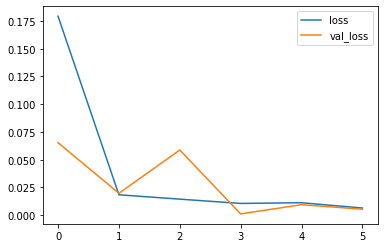

In [28]:
metrics_df[["loss","val_loss"]].plot();

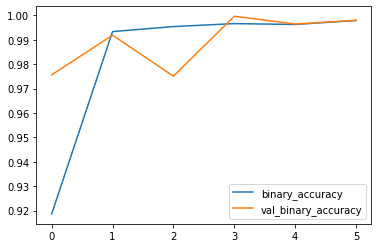

In [29]:
metrics_df[["binary_accuracy","val_binary_accuracy"]].plot();

In [30]:
loss, accuracy = model.evaluate(validation_set)

246/246 [==============================] - 5s 20ms/step - loss: 0.0054 - binary_accuracy: 0.9980


In [31]:
print('Accuracy on test dataset:', accuracy)

Accuracy on test dataset: 0.9979661703109741


In [32]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


(200, 200, 3)


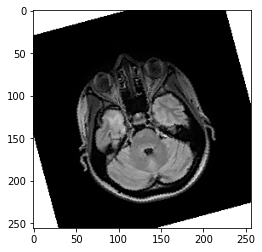

 is good

(200, 200, 3)


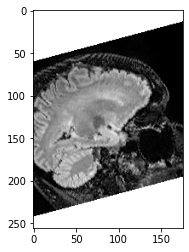

 is good

(200, 200, 3)


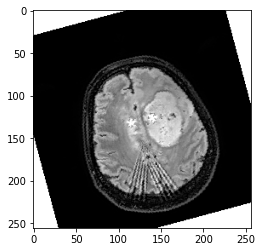

 is bad

(200, 200, 3)


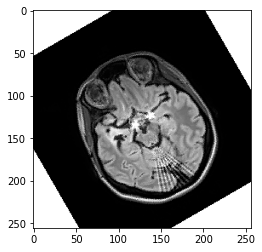

 is bad

(200, 200, 3)


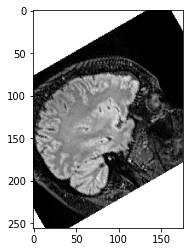

 is bad

(200, 200, 3)


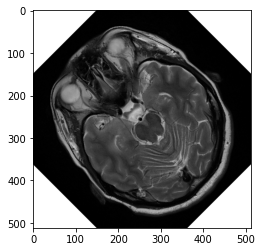

 is good

(200, 200, 3)


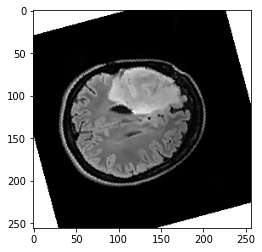

 is good

(200, 200, 3)


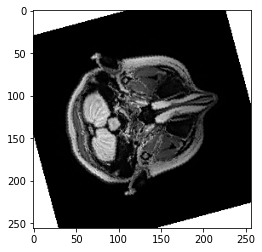

 is good

(200, 200, 3)


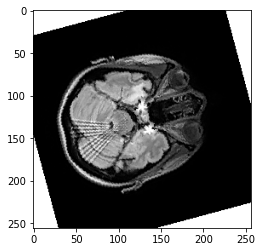

 is bad

(200, 200, 3)


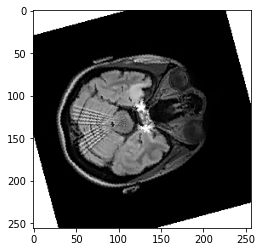

 is bad

(200, 200, 3)


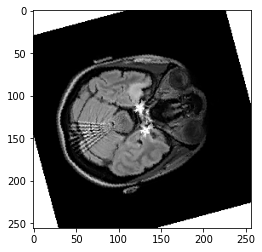

 is bad

(200, 200, 3)


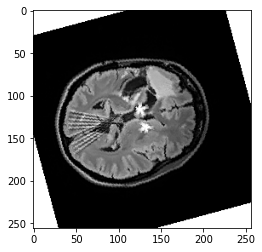

 is bad

(200, 200, 3)


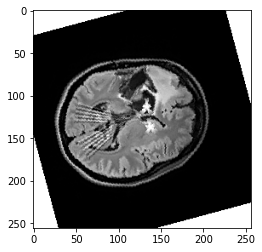

 is bad

(200, 200, 3)


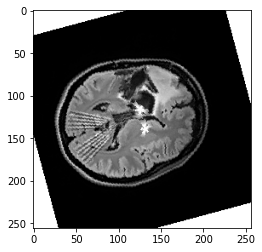

 is bad

(200, 200, 3)


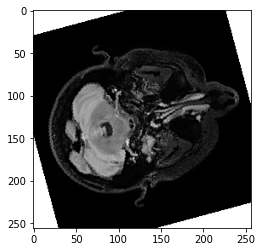

 is good

(200, 200, 3)


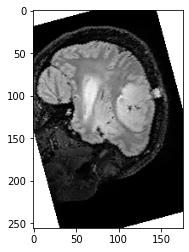

 is good

(200, 200, 3)


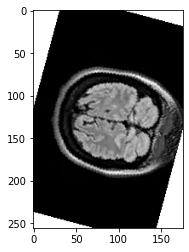

 is good

(200, 200, 3)


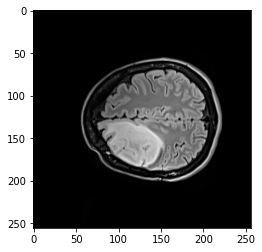

 is good

(200, 200, 3)


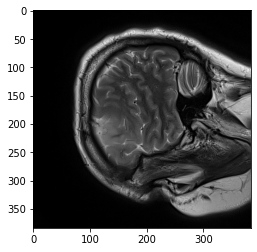

 is good

(200, 200, 3)


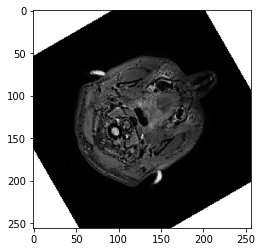

 is good

(200, 200, 3)


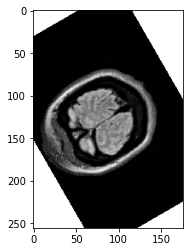

 is good

(200, 200, 3)


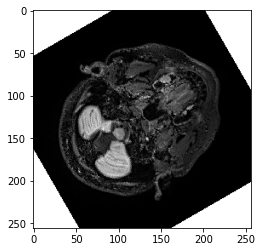

 is good

(200, 200, 3)


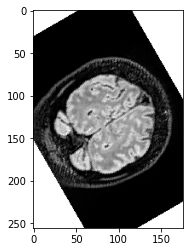

 is good

(200, 200, 3)


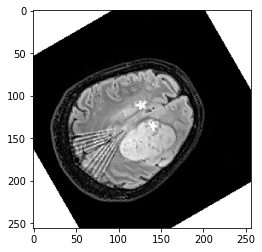

 is bad

(200, 200, 3)


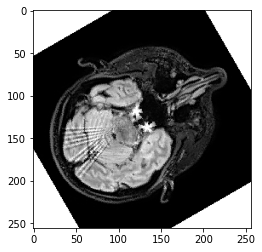

 is bad

(200, 200, 3)


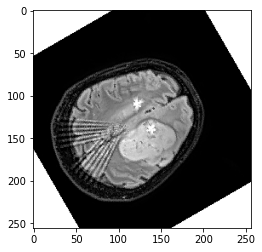

 is bad

(200, 200, 3)


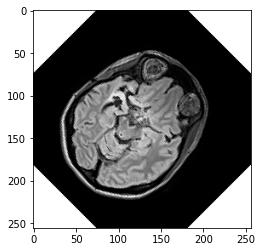

 is good

(200, 200, 3)


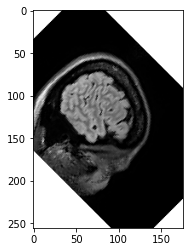

 is good

(200, 200, 3)


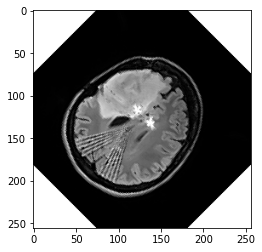

 is bad

(200, 200, 3)


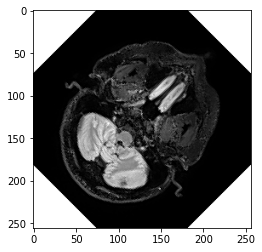

 is good

(200, 200, 3)


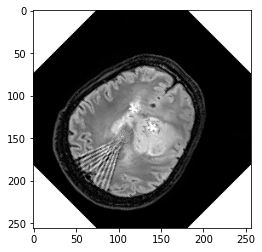

 is bad

(200, 200, 3)


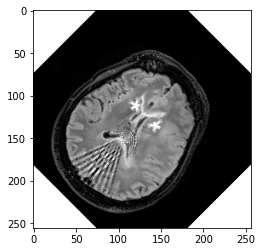

 is bad

(200, 200, 3)


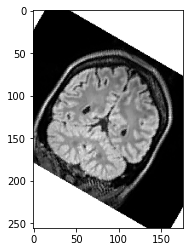

 is good

(200, 200, 3)


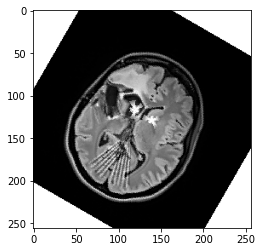

 is bad

(200, 200, 3)


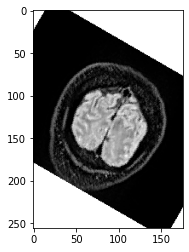

 is good

(200, 200, 3)


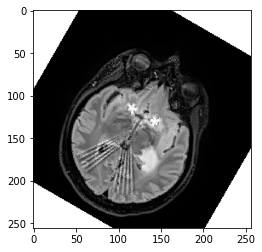

 is bad

(200, 200, 3)


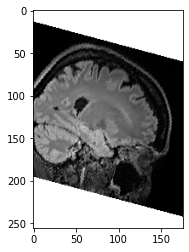

 is good

(200, 200, 3)


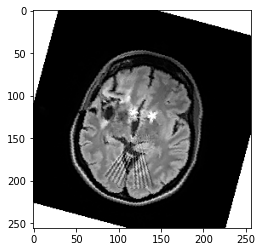

 is bad

(200, 200, 3)


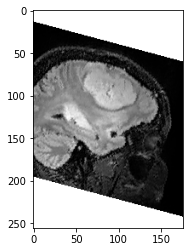

 is good

(200, 200, 3)


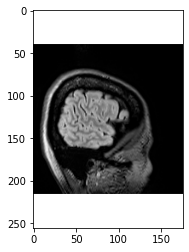

 is good

(200, 200, 3)


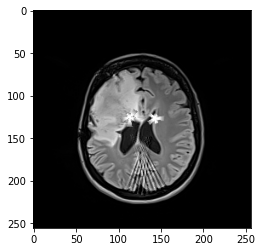

 is bad

(200, 200, 3)


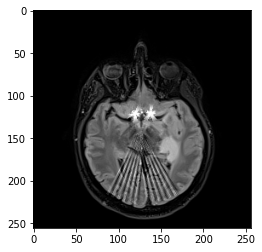

 is bad

(200, 200, 3)


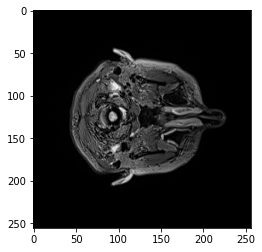

 is good

(200, 200, 3)


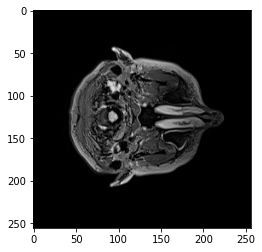

 is good

(200, 200, 3)


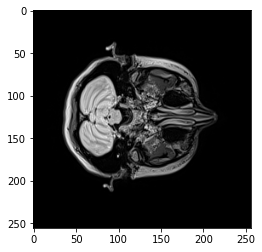

 is good

(200, 200, 3)


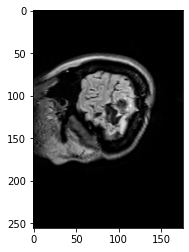

 is good

(200, 200, 3)


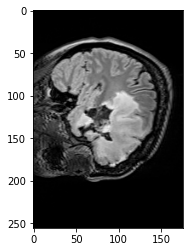

 is good

(200, 200, 3)


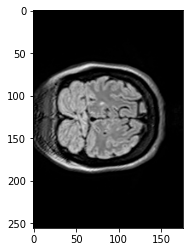

 is good

(200, 200, 3)


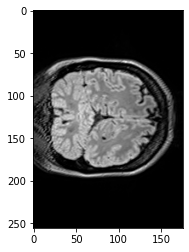

 is good

(200, 200, 3)


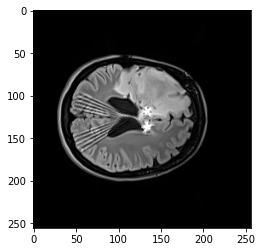

 is bad

(200, 200, 3)


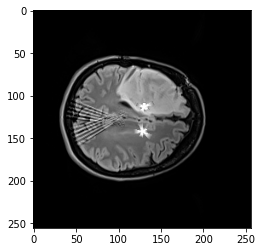

 is bad

(200, 200, 3)


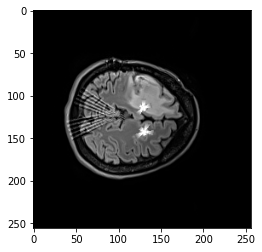

 is bad

(200, 200, 3)


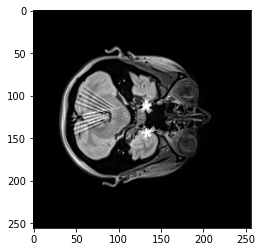

 is bad

(200, 200, 3)


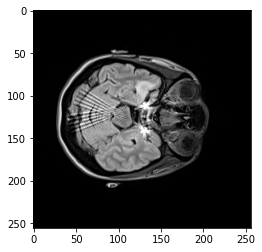

 is bad

(200, 200, 3)


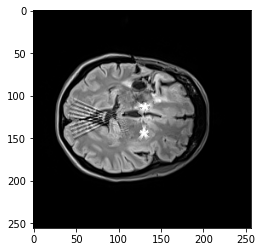

 is bad

(200, 200, 3)


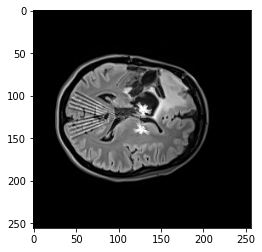

 is bad

(200, 200, 3)


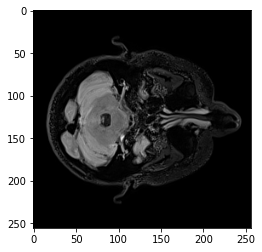

 is good

(200, 200, 3)


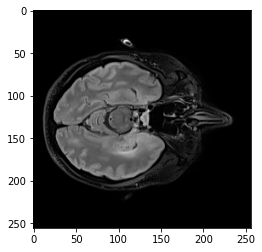

 is good

(200, 200, 3)


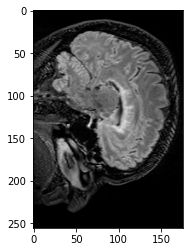

 is good

(200, 200, 3)


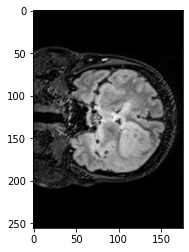

 is good

(200, 200, 3)


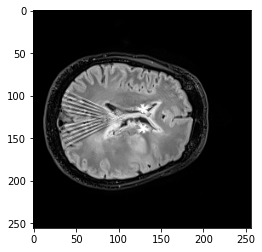

 is bad

(200, 200, 3)


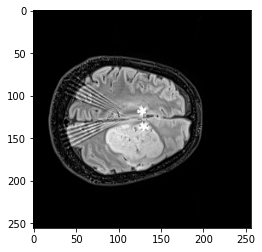

 is bad

(200, 200, 3)


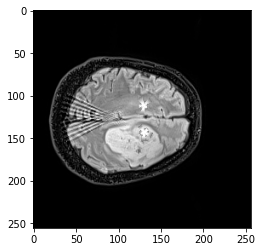

 is bad

(200, 200, 3)


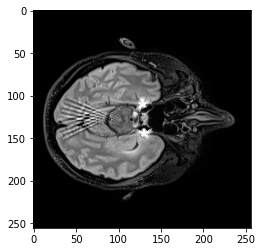

 is bad

(200, 200, 3)


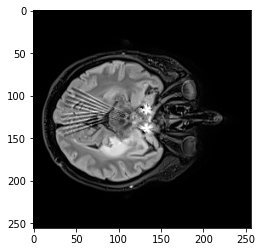

 is bad

(200, 200, 3)


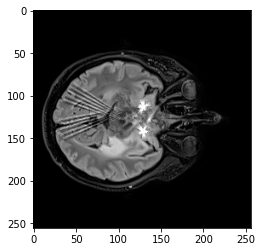

 is bad

(200, 200, 3)


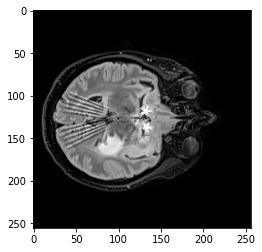

 is bad

(200, 200, 3)


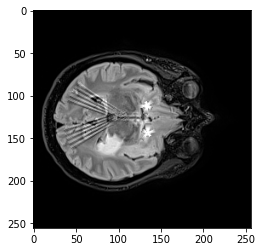

 is bad

(200, 200, 3)


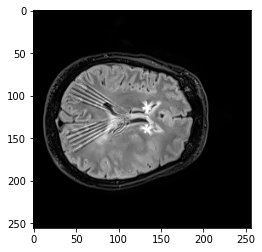

 is bad

(200, 200, 3)


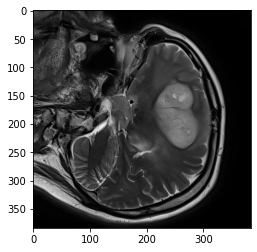

 is good

(200, 200, 3)


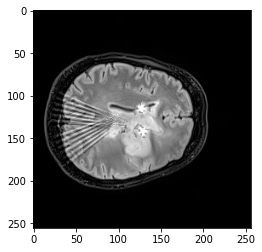

 is bad

(200, 200, 3)


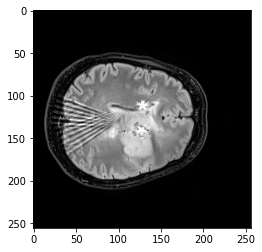

 is bad

(200, 200, 3)


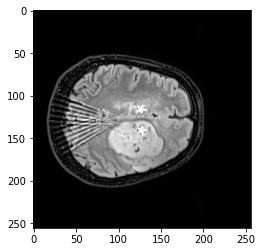

 is bad

(200, 200, 3)


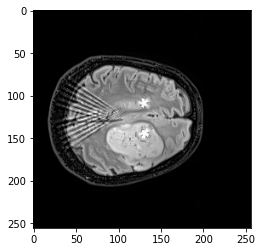

 is bad

(200, 200, 3)


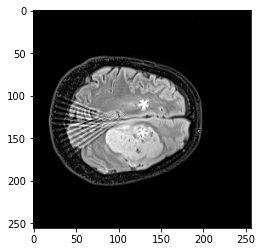

 is bad

(200, 200, 3)


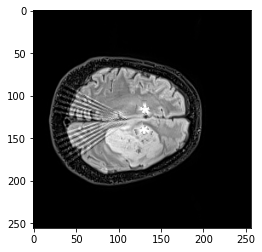

 is bad

(200, 200, 3)


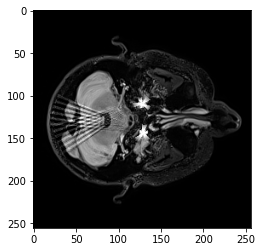

 is bad

(200, 200, 3)


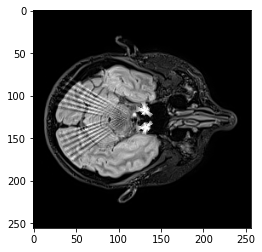

 is bad

(200, 200, 3)


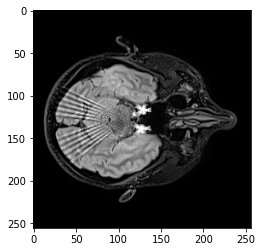

 is bad

(200, 200, 3)


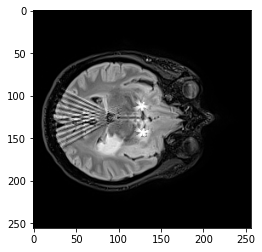

 is bad

(200, 200, 3)


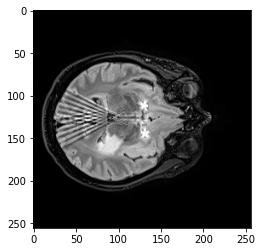

 is bad

(200, 200, 3)


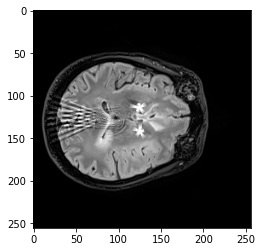

 is bad

(200, 200, 3)


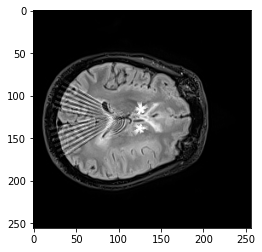

 is bad

(200, 200, 3)


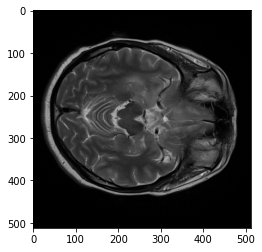

 is good


In [33]:
for name in os.listdir(test_dir):
    print()
    test_image = image.load_img(os.path.join(test_dir, name), target_size=(200, 200))
    test_image = image.img_to_array(test_image)
    print(test_image.shape)

    img = mpimg.imread(os.path.join(test_dir, name))
    plt.imshow(img)
    plt.show()
    
    test_image = np.expand_dims(test_image, axis=0)
    prediction = model.predict(test_image)
    prediction[0][0]
    if prediction[0][0]>0.5:
        print(" is good")
    else:
        print(" is bad")

In [34]:
model.save("model-001-rot.h5")